In [1]:
import os
import pandas as pd
from utilities import *


In [2]:
# === Configuration ===
logs_path = "log_files/"
log_files_dict = {
                    '1': 'SAVELOG.log',
                }

## Get the data out

In [3]:
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(logs_path + log_files_dict['1'], header=0)
# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,ctrl_comp_time,x_ref,y_ref,z_ref,yaw_ref,throttle,roll_rate,pitch_rate,yaw_rate,save_tube_pyH,save_tube_pyL,save_tube_pzH,save_tube_pzL
0,15.014483,-0.024378,3.919432,-11.640071,-0.002903,0.120559,0.0,3.919512,-11.638477,-0.009561,0.583587,-1.000000,0.017462,0.019205,-11.639971,-11.640171,0.008251,0.008051
1,15.551691,-0.004363,3.921540,-11.632602,0.000866,0.192311,0.0,3.919512,-11.638477,-0.009561,0.583650,-1.000000,0.050973,0.078534,-11.606676,-11.610587,0.325225,-0.396250
2,15.694168,-0.004363,3.921540,-11.632602,0.000866,0.001239,0.0,3.921634,-11.631053,-0.010052,0.583552,-1.000000,0.134550,0.253101,-11.517196,-11.570982,0.660484,-1.013918
3,15.699768,-0.027042,3.933318,-11.632916,0.004376,0.001119,0.0,3.921748,-11.629152,-0.020052,0.598485,-0.763712,0.320966,0.526550,-11.236010,-11.658278,1.300238,-2.128343
4,15.709734,-0.027457,3.935211,-11.629445,0.004657,0.001316,0.0,3.921877,-11.626903,-0.030052,0.600804,-0.730089,0.464676,0.663275,-9.629038,-13.003959,3.001078,-4.491370


### This is an example of the uses of the utilities module I've provided

In [4]:
calculate_overall_rmse(df_log)

0.17914413183729258

### Fill In this section with your own data analysis using pandas

In [5]:
actual_values, reference_values = get_flat_output_and_desired(df_log)

### This is a nice template from my previous work to properly export complex plots as pdfs for writing papers in latek

In [10]:
import os
import matplotlib.pyplot as plt

In [6]:
# Font and figure settings
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['EB Garamond']

In [7]:
x,y,z,yaw = actual_values[:,0], actual_values[:,1], actual_values[:,2], actual_values[:,3]
x_ref,y_ref,z_ref,yaw_ref = reference_values[:,0], reference_values[:,1], reference_values[:,2], reference_values[:,3]

findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found because none of the following families were found: EB Garamond
findfont: Generic family 'serif' not found bec

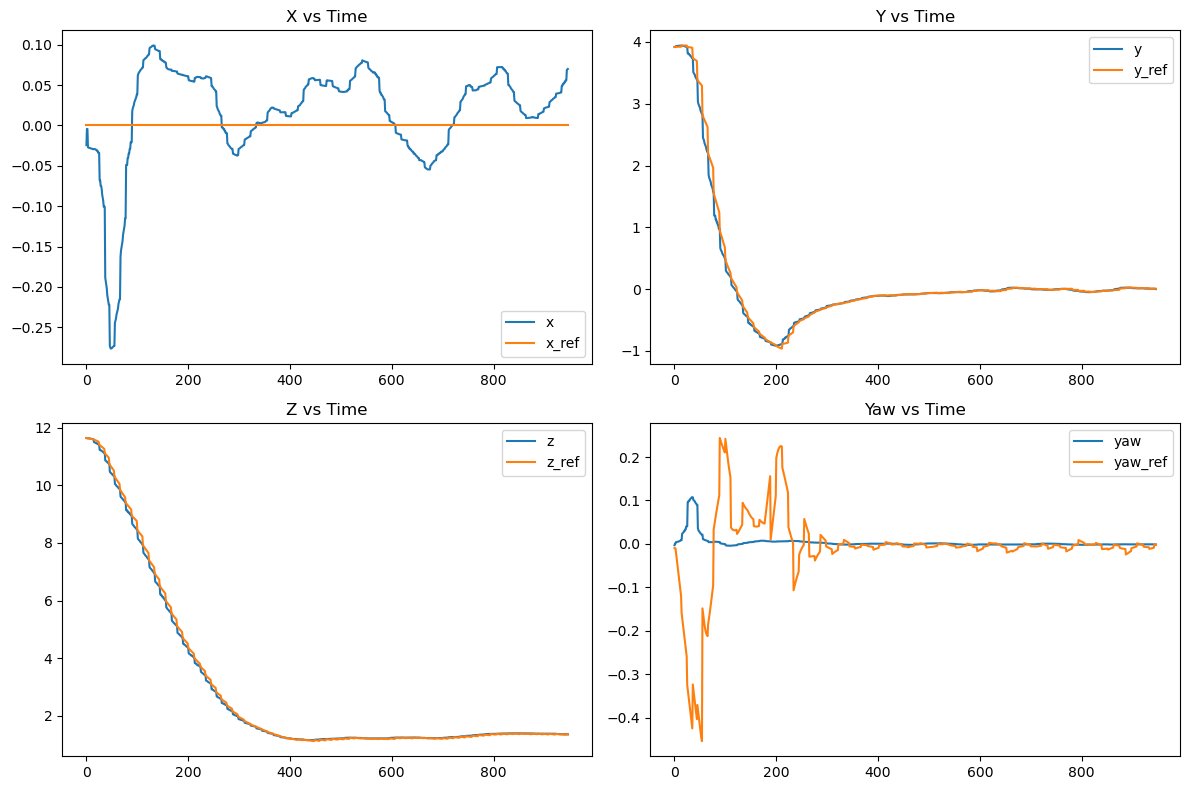

In [8]:
# use matplotlib to make a 2x2 grid of plots for x and x_ref v time, and so on for y,z,yaw
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot x and x_ref
axs[0, 0].plot(x, label='x')
axs[0, 0].plot(x_ref, label='x_ref')
axs[0, 0].set_title('X vs Time')
axs[0, 0].legend()

# Plot y and y_ref
axs[0, 1].plot(y, label='y')
axs[0, 1].plot(y_ref, label='y_ref')
axs[0, 1].set_title('Y vs Time')
axs[0, 1].legend()

# Plot z and z_ref
axs[1, 0].plot(z, label='z')
axs[1, 0].plot(z_ref, label='z_ref')
axs[1, 0].set_title('Z vs Time')
axs[1, 0].legend()

# Plot yaw and yaw_ref
axs[1, 1].plot(yaw, label='yaw')
axs[1, 1].plot(yaw_ref, label='yaw_ref')
axs[1, 1].set_title('Yaw vs Time')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [9]:
# shape_names = ['Circle A', 'Circle B', 'Lemniscate A', 'Lemniscate B', 'Lemniscate C', 'Triangle', 'Sawtooth']

# # Trimming settings
# trim_seconds = 5.5
# sampling_rate_hz = 100
# rows_to_trim = int(trim_seconds * sampling_rate_hz)

# # Line style settings
# line_width = 2
# ref_linestyle = (0, (5, 5))  # 5pt on, 5pt off

# # Create figure
# fig, axs = plt.subplots(2, 7, figsize=(26, 10), sharex=False, sharey=False)
# axs = axs.flatten()

# fw = 'medium'
# fs_title = 22
# fs_label = 19
# tick_fontsize = 7.5

# alphabet_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']

# for i, key in enumerate(['1', '2', '3', '4', '5', '6', '7']):
#     if key == '2':
#         x_col, y_col = 'x', 'z'
#     elif key in ['4', '5']:
#         x_col, y_col = 'y', 'z'
#     else:
#         x_col, y_col = 'x', 'y'

#     # === NR ===
#     df_nr = pd.read_csv(os.path.join(nr_data_path, nr_data_dict[key]))
#     if len(df_nr) > 2 * rows_to_trim:
#         df_nr = df_nr.iloc[rows_to_trim:-rows_to_trim]
#     ax = axs[i]
#     ax.plot(df_nr[x_col], df_nr[y_col], color='red', linestyle='-', linewidth=line_width, label='Actual')
#     ax.plot(df_nr[f'{x_col}_ref'], df_nr[f'{y_col}_ref'], color='blue', linestyle=ref_linestyle, linewidth=line_width, label='Reference')
#     ax.set_xlabel(f'{x_col} (m)', fontsize=fs_label, fontweight=fw)
#     ax.set_ylabel(f'{y_col} (m)', fontsize=fs_label, fontweight=fw)
#     ax.set_title(f'{alphabet_labels[i]}) NR: {shape_names[i]}', fontsize=fs_title, fontweight=fw)
#     ax.tick_params(labelsize=tick_fontsize)
#     ax.set_aspect('equal', adjustable='datalim')

#     # === MPC ===
#     df_mpc = pd.read_csv(os.path.join(mpc_data_path, mpc_data_dict[key]))
#     if len(df_mpc) > 2 * rows_to_trim:
#         df_mpc = df_mpc.iloc[rows_to_trim:-rows_to_trim]
#     ax = axs[i + 7]
#     ax.plot(df_mpc[x_col], df_mpc[y_col], color='red', linestyle='-', linewidth=line_width, label='Actual')
#     ax.plot(df_mpc[f'{x_col}_ref'], df_mpc[f'{y_col}_ref'], color='blue', linestyle=ref_linestyle, linewidth=line_width, label='Reference')
#     ax.set_xlabel(f'{x_col} (m)', fontsize=fs_label, fontweight=fw)
#     ax.set_ylabel(f'{y_col} (m)', fontsize=fs_label, fontweight=fw)
#     ax.set_title(f'{alphabet_labels[i + 7]}) NMPC: {shape_names[i]}', fontsize=fs_title, fontweight=fw)
#     ax.tick_params(labelsize=tick_fontsize)
#     ax.set_aspect('equal', adjustable='datalim')

# plt.tight_layout(rect=[0, 0.03, 1, 1])
# plt.savefig("traj_comparison_2x_custom_axes_trimmed.pdf", format='pdf', bbox_inches='tight')
# plt.show()